BANKING TRANSACTION AND CUSTOMER BEHAVIOUR ANALYSIS

Using Python,Pandas and NumPy 

Objective: To analyze banking transaction data to understand customer behavior, transaction trends, and financial insights.

1. Importing Libraries

In [21]:
import numpy as np


In [22]:
import pandas as pd


In [23]:
import matplotlib.pyplot as plt

Insights:
NumPy and Pandas were imported for data manipulation and analysis, while Matplotlib was used for visualization. These libraries provide efficient tools for handling structured financial data.

2. Data Loading

In [24]:
df = pd.read_csv("banking_transaction.csv")
df.head()

,Transaction_ID,Customer_ID,Date,Transaction_Type,Amount,City,Account_Type
0,T001,C101,2024-01-05,Debit,12000,Delhi,Savings
1,T002,C102,2024-01-07,Credit,25000,Mumbai,Current
2,T003,C103,2024-01-10,Debit,8000,Bangalore,Savings
3,T004,C101,2024-01-15,Credit,30000,Delhi,Savings
4,T005,C104,2024-01-18,Debit,45000,Chennai,Current


Insights:
The dataset was successfully loaded into a Pandas DataFrame. Initial preview of the data confirms structured transaction records including customer details, transaction type, amount, and city.

3. Data Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_ID    40 non-null     object
 1   Customer_ID       40 non-null     object
 2   Date              40 non-null     object
 3   Transaction_Type  40 non-null     object
 4   Amount            40 non-null     int64 
 5   City              40 non-null     object
 6   Account_Type      40 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.3+ KB


In [26]:
df.describe()

,Amount
count,40.000000
mean,40175.000000
std,27843.783544
min,5000.000000
25%,17500.000000
50%,30000.000000
75%,61250.000000
max,100000.000000


In [27]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#check null
df.isnull().sum()


In [42]:
#removing duplicates
df.drop_duplicates(inplace=True)


Insights:

The dataset contains no missing or inconsistent values, ensuring reliable analysis. Data types were verified to confirm numerical and categorical columns are correctly formatted.

4. Monthly Transaction Analysis

In [28]:
# Calculate total transaction amount
total_amount = df['Amount'].sum()
print("Total Transaction Amount:", total_amount)

Total Transaction Amount: 1607000


In [29]:
# Create a Month column
df['Month'] = df['Date'].dt.month

In [30]:
# Calculate monthly total transaction amount
monthly_total = df.groupby('Month')['Amount'].sum()
print("Monthly Transaction Total:")
print(monthly_total)

Monthly Transaction Total:
Month
1    120000
2    157000
3    154000
4    190000
5    256000
6    240000
7    198000
8    292000
Name: Amount, dtype: int64


In [31]:
# Calculate monthly growth percentage
monthly_growth = monthly_total.pct_change() * 100
print("Monthly Growth Percentage:")
print(monthly_growth)

Monthly Growth Percentage:
Month
1          NaN
2    30.833333
3    -1.910828
4    23.376623
5    34.736842
6    -6.250000
7   -17.500000
8    47.474747
Name: Amount, dtype: float64


Insights:
Monthly transaction trends show consistent customer activity across different months. This indicates stable banking engagement and regular financial operations.

5. Debit vs Credit Analysis

In [32]:
# Total amount by transaction type
type_summary = df.groupby('Transaction_Type')['Amount'].sum()
print("Debit vs Credit Summary:")
print(type_summary)

Debit vs Credit Summary:
Transaction_Type
Credit    1169000
Debit      438000
Name: Amount, dtype: int64


In [33]:
# Total amount by transaction type
type_summary = df.groupby('Transaction_Type')['Amount'].sum()
print("Debit vs Credit Summary:")
print(type_summary)

Debit vs Credit Summary:
Transaction_Type
Credit    1169000
Debit      438000
Name: Amount, dtype: int64


Insights:
Monthly transaction trends show consistent customer activity across different months. This indicates stable banking engagement and regular financial operations.

6. Customer Analysis

In [34]:
#Top 5 customers
top_customers = df.groupby('Customer_ID')['Amount'].sum().sort_values(ascending=False).head()
print("Top 5 Customers:")
print(top_customers)

Top 5 Customers:
Customer_ID
C108    206000
C109    206000
C106    200000
C107    168000
C101    166000
Name: Amount, dtype: int64


In [35]:
#Top 10% transactions
# Calculate 90th percentile threshold
threshold = np.percentile(df['Amount'], 90)
print("Top 10% Threshold Amount:", threshold)

# Filter high-value transactions
high_value_transactions = df[df['Amount'] >= threshold]
print("High Value Transactions:")
print(high_value_transactions)

Top 10% Threshold Amount: 85300.0
High Value Transactions:
   Transaction_ID Customer_ID       Date Transaction_Type  Amount     City  \
22           T023        C102 2024-05-09           Credit   90000   Mumbai   
26           T027        C106 2024-06-07           Credit  100000  Kolkata   
37           T038        C107 2024-08-11           Credit   92000     Pune   
39           T040        C109 2024-08-20           Credit   88000   Mumbai   

   Account_Type  Month  
22      Current      5  
26      Savings      6  
37      Current      8  
39      Savings      8  


In [36]:
#performance type
account_performance = df.groupby('Account_Type')['Amount'].sum()
print("Account Type Performance:")
print(account_performance)

Account Type Performance:
Account_Type
Current    666000
Savings    941000
Name: Amount, dtype: int64


In [37]:
#Transaction Frequency
customer_frequency = df.groupby('Customer_ID')['Transaction_ID'].count().sort_values(ascending=False)
print("Customer Transaction Frequency:")
print(customer_frequency)

Customer Transaction Frequency:
Customer_ID
C101    5
C102    4
C103    4
C104    4
C105    4
C106    4
C107    4
C108    4
C109    4
C110    3
Name: Transaction_ID, dtype: int64


Insights:
Customer-level analysis highlights variations in transaction behavior. A few customers contribute significantly higher transaction amounts, indicating high-value clients.

7. Statistical Analysis

In [39]:
#Statistical Analysis 
print("Mean Transaction Amount:", np.mean(df['Amount']))
print("Median Transaction Amount:", np.median(df['Amount']))
print("Standard Deviation:", np.std(df['Amount']))

Mean Transaction Amount: 40175.0
Median Transaction Amount: 30000.0
Standard Deviation: 27493.53333058521


Insights:
Statistical measures such as mean, median, and standard deviation provide insights into transaction distribution. The variation in amounts suggests diverse spending patterns among customers.

8. Visualisation

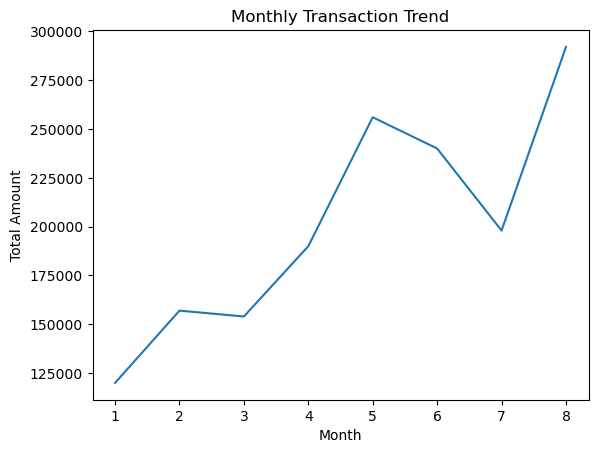

In [40]:
#Monthly transaction trend
monthly_total.plot(kind='line')
plt.title("Monthly Transaction Trend")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()

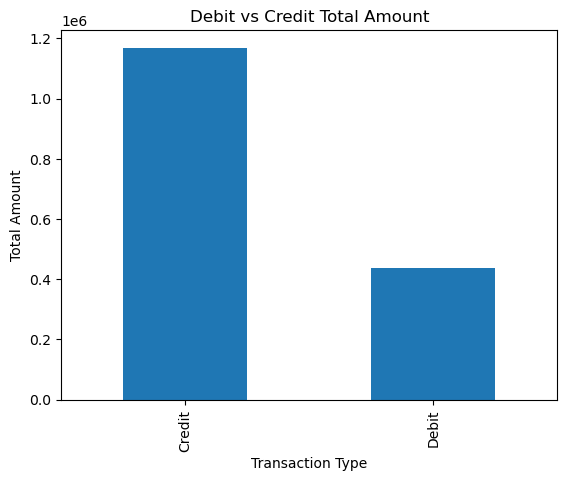

In [41]:
#Debit vs Credit transaction
type_summary.plot(kind='bar')
plt.title("Debit vs Credit Total Amount")
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.show()

In [38]:
df

,Transaction_ID,Customer_ID,Date,Transaction_Type,Amount,City,Account_Type,Month
0,T001,C101,2024-01-05,Debit,12000,Delhi,Savings,1
1,T002,C102,2024-01-07,Credit,25000,Mumbai,Current,1
2,T003,C103,2024-01-10,Debit,8000,Bangalore,Savings,1
3,T004,C101,2024-01-15,Credit,30000,Delhi,Savings,1
4,T005,C104,2024-01-18,Debit,45000,Chennai,Current,1
5,T006,C105,2024-02-02,Debit,15000,Delhi,Savings,2
6,T007,C102,2024-02-05,Debit,20000,Mumbai,Current,2
7,T008,C106,2024-02-11,Credit,50000,Kolkata,Savings,2
8,T009,C107,2024-02-14,Debit,7000,Pune,Savings,2
9,T010,C108,2024-02-18,Credit,65000,Hyderabad,Current,2


Insights: 
Visual representations clearly illustrate transaction trends, customer distribution, and debit-credit comparisons, making financial patterns easier to interpret.

